In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
# load all csvs 

files = glob('retrieval_results/*.csv')

dfs = []
for file in files:
    df = pd.read_csv(file)
    print(file)
    print(df.columns)
    print('*'*50)
    dfs.append(df)


retrieval_results/results_colbert_msmarco_over_50_without_chatgpt_clean_queries.csv
Index(['name', 'map', 'bpref', 'ndcg_cut_10'], dtype='object')
**************************************************
retrieval_results/colbert-pubmed-bert-over_50-rankings_results.csv
Index(['Unnamed: 0', 'name', 'map', 'bpref', 'ndcg_cut_10'], dtype='object')
**************************************************
retrieval_results/results_QE_dph_over_50_without_chatgpt_clean_queries.csv
Index(['name', 'map', 'bpref', 'ndcg_cut_10'], dtype='object')
**************************************************
retrieval_results/results_QE_tfidf_over_50_without_chatgpt_clean_queries.csv
Index(['name', 'map', 'bpref', 'ndcg_cut_10'], dtype='object')
**************************************************
retrieval_results/colbertv2.0-over_50-rankings_results.csv
Index(['Unnamed: 0', 'name', 'map', 'bpref', 'ndcg_cut_10'], dtype='object')
**************************************************


In [15]:
# concat all dataframes
df = pd.concat(dfs, ignore_index=True)
# rename column ndcg_cut_10 to nDCG@10
df.rename(columns={'ndcg_cut_10':'nDCG@10'}, inplace=True)

/tmp/ipykernel_13553/84386640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = vis_df['name'].str.replace(name + '_', '')
/tmp/ipykernel_13553/84386640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = pd.Categorical(vis_df['name'], ['QE_dph', 'QE_tfidf', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed'])


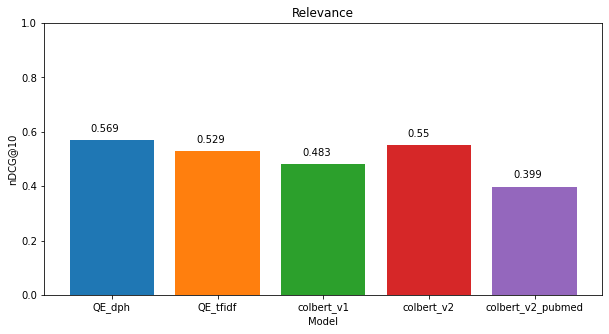

/tmp/ipykernel_13553/84386640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = vis_df['name'].str.replace(name + '_', '')
/tmp/ipykernel_13553/84386640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = pd.Categorical(vis_df['name'], ['QE_dph', 'QE_tfidf', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed'])


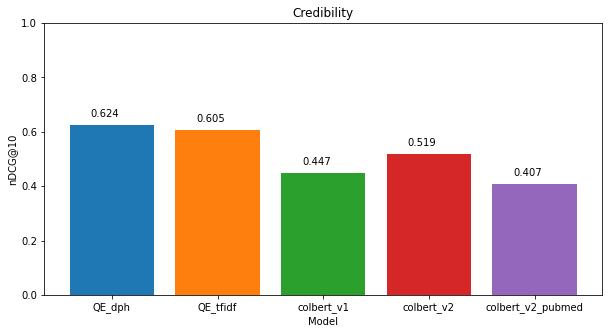

/tmp/ipykernel_13553/84386640.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = vis_df['name'].str.replace(name + '_', '')
/tmp/ipykernel_13553/84386640.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vis_df['name'] = pd.Categorical(vis_df['name'], ['QE_dph', 'QE_tfidf', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed'])


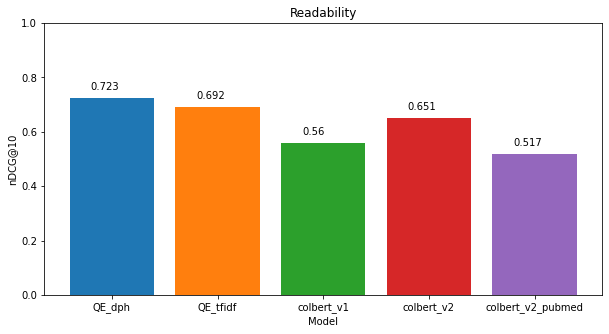

In [36]:
names = ['qrels', 'qcred', 'qread']
titles = ['Relevance', 'Credibility', 'Readability']

# for each name, filter df at column 'name' and plot
for name in names:
    vis_df = df[df['name'].str.contains(name)]
    vis_df['name'] = vis_df['name'].str.replace(name + '_', '')
    # sort columns after name in this order ['QE_dph', 'QE_tfidf', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed']
    vis_df['name'] = pd.Categorical(vis_df['name'], ['QE_dph', 'QE_tfidf', 'colbert_v1', 'colbert_v2', 'colbert_v2_pubmed'])
    vis_df = vis_df.sort_values('name')

    # plot name and nDCG@10 as bar plot
    # add exact value above each bar
    # different color for each model
    # increase figure size
    plt.figure(figsize=(10, 5))
    plt.bar(vis_df['name'], vis_df['nDCG@10'], color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
    for i, v in enumerate(vis_df['nDCG@10']):
        plt.text(i-0.2, v+0.03, str(round(v, 3)))

    plt.ylabel('nDCG@10')
    plt.xlabel('Model')
    plt.ylim(0.0, 1.0)
    plt.title(titles[names.index(name)])
    plt.show()